In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LassoCV,Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [2]:
from sklearn.datasets import load_boston

data=load_boston(return_X_y=False)

C:\Users\Alina\anaconda3\envs\tesnorflow\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California ho

In [3]:
df=pd.DataFrame(data.data,columns=data.feature_names)

In [4]:
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [5]:
df['Target']=data.target

In [6]:
X= df.drop(columns='Target')
Y=df['Target']

In [7]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.3,random_state=91)

In [8]:
from sklearn.linear_model import LinearRegression

lr=LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [9]:
lr.coef_

array([-1.59496437e-01,  4.99248313e-02,  2.89360229e-02,  9.19531894e-01,
       -1.75135848e+01,  3.70315495e+00,  1.04296178e-03, -1.58419514e+00,
        3.45143638e-01, -1.46359546e-02, -1.00320587e+00,  1.14201859e-02,
       -5.04826055e-01])

In [10]:
lr.intercept_


38.03553331945657

In [11]:
y_pred=lr.predict(X_test)
pred_train=lr.predict(X_train)

In [12]:

print('R squared on training set ', round(lr.score(X_train, y_train)*100, 3))
print('R squared on test set', round(lr.score(X_test, y_test)*100, 3))

R squared on training set  74.968
R squared on test set 70.198


In [13]:
mse_train = mean_squared_error(y_train, pred_train)
print('MSE training set', round(mse_train, 3))


mse_test =mean_squared_error(y_test, y_pred)
print('MSE test set', round(mse_test, 3))

MSE training set 21.59
MSE test set 23.885


In [14]:
from sklearn.linear_model import Lasso,LassoCV

lasso = Lasso(alpha=1)
lasso.fit(X_train, y_train)



Lasso(alpha=1)

In [15]:
lasso.intercept_

42.30444141175519

In [16]:
lasso.coef_

array([-0.09292278,  0.05627423, -0.        ,  0.        , -0.        ,
        0.77290255,  0.018177  , -0.83770588,  0.27782578, -0.01707107,
       -0.66386855,  0.00878415, -0.75115889])

In [17]:
print('R squared training set', round(lasso.score(X_train, y_train)*100, 3))
print('R squared test set', round(lasso.score(X_test, y_test)*100, 3))

R squared training set 69.618
R squared test set 64.11


In [18]:
#MSE for the training and test set.



# Training data
pred_train = lasso.predict(X_train)
mse_train = mean_squared_error(y_train, pred_train)
print('MSE training set', round(mse_train, 4))

# Test data
pred = lasso.predict(X_test)
mse_test =mean_squared_error(y_test, pred)
print('MSE test set', round(mse_test, 4))

MSE training set 26.2042
MSE test set 28.7641


In [19]:
alphas = np.linspace(0.01,1000,100)
lasso = Lasso(max_iter=10000)
coefs = []

for a in alphas:
    lasso.set_params(alpha=a)
    lasso.fit(X_train, y_train)
    coefs.append(lasso.coef_)
    print('The r2 score for alpha {} is {} '.format(a , r2_score(y_test,lasso.predict(X_test))))
    print('The mean squared error for alpha {} is {}'.format(a , mean_squared_error(y_test,lasso.predict(X_test))))
    print('\n')



The r2 score for alpha 0.01 is 0.6993891349041714 
The mean squared error for alpha 0.01 is 24.09256070173152


The r2 score for alpha 10.110909090909091 is 0.469342645885388 
The mean squared error for alpha 10.110909090909091 is 42.52971532399857


The r2 score for alpha 20.211818181818185 is 0.3719043291190989 
The mean squared error for alpha 20.211818181818185 is 50.338942580698095


The r2 score for alpha 30.312727272727276 is 0.22019698946383692 
The mean squared error for alpha 30.312727272727276 is 62.4975792566461


The r2 score for alpha 40.413636363636364 is 0.2043314637259146 
The mean squared error for alpha 40.413636363636364 is 63.769127248711946


The r2 score for alpha 50.514545454545456 is 0.19189143647228357 
The mean squared error for alpha 50.514545454545456 is 64.76613749198361


The r2 score for alpha 60.61545454545455 is 0.18695572975783092 
The mean squared error for alpha 60.61545454545455 is 65.16171139642645


The r2 score for alpha 70.71636363636365 is 0.1

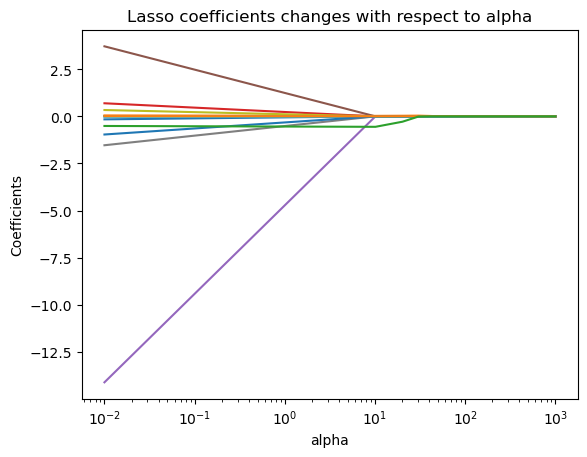

In [20]:
ax = plt.gca()

ax.plot(alphas, coefs)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('Coefficients')
plt.title('Lasso coefficients changes with respect to alpha');

In [21]:


alphas=np.random.uniform(0,100,500)

# Define the steps of the pipeline
steps = [
    ('scaler', StandardScaler()), 
    ('lasso', LassoCV(alphas=alphas, cv=10, random_state=91)) 
]

# Create the pipeline
pipeline = Pipeline(steps)

# Fit the pipeline to the data
pipeline.fit(X_train, y_train)




Pipeline(steps=[('scaler', StandardScaler()),
                ('lasso',
                 LassoCV(alphas=array([66.18647275,  1.02730248, 22.6565714 , 69.29316353, 39.67644794,
       33.90385471, 77.49575652, 61.72839854, 64.11463228, 39.12873711,
       36.96669549, 89.39712513, 71.68056316,  8.43664756,  6.89767015,
       35.61312544, 99.98018403, 25.91204893, 32.54621142, 35.06016903,
       32.37442735, 86.96399256, 76.84435077, 80....
       60.12590602, 41.68734521, 84.23536164, 15.67983923, 83.7192162 ,
       74.27716656, 21.03037171, 14.29505354, 41.00450205, 81.66707972,
       92.03021279, 15.34723702, 81.24006611, 16.05753488, 80.57624449,
       52.26135486, 41.42656354,  9.71978416, 83.84015848, 87.12932748,
        0.51403229, 76.35161696, 96.93415314, 79.45361861, 18.07396486,
       22.32841341, 56.2218652 , 70.7327092 , 45.63332689, 67.66779836]),
                         cv=10, random_state=91))])

In [22]:
best_alpha = pipeline.named_steps['lasso'].alpha_
best_alpha

0.4202452563541792

In [23]:
# Set best alpha
lasso_best = Lasso(alpha=best_alpha)
lasso_best.fit(X_train, y_train)

Lasso(alpha=0.4202452563541792)

In [24]:
lasso_best.intercept_

32.079624793763486

In [25]:
lasso_best.coef_

array([-0.13055419,  0.05383335, -0.02909087,  0.        , -0.        ,
        2.59400683, -0.        , -1.1151073 ,  0.29337535, -0.01638249,
       -0.73938652,  0.01100582, -0.61741132])

In [26]:
y_pred=lasso_best.predict(X_test)
pred_train = lasso_best.predict(X_train)

In [27]:
print('R2 score', r2_score(y_pred,y_test))

R2 score 0.5130276493843171


In [28]:
print('mean squared eroor',mean_squared_error(y_test,y_pred))

mean squared eroor 25.944171691870096


In [29]:
print('R squared on training set with best alpha', round(lasso_best.score(X_train, y_train)*100, 3))
print('R squared on test set with best alpha', round(lasso_best.score(X_test, y_test)*100, 3))

R squared on training set with best alpha 73.093
R squared on test set with best alpha 67.629


In [30]:
mse_train = mean_squared_error(y_train, pred_train)
print('MSE training set', round(mse_train, 3))


mse_test =mean_squared_error(y_test, y_pred)
print('MSE test set', round(mse_test, 3))

MSE training set 23.208
MSE test set 25.944
